<a href="https://colab.research.google.com/github/aml7hawaiiedu/CCAPLandCoverProject/blob/main/Image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages('gdalutils')
install.packages('sf')
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("DBI")
install.packages("RSQLite")
install.packages("RPostgreSQL")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘gdalutils’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘googletoken’ is not available for this version of R

A version of this packag

# New Section

In [3]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)
library(zip)

Linking to GEOS 3.10.2, GDAL 3.4.3, PROJ 8.2.1; sf_use_s2() is TRUE

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, were retired in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.


Attaching package: ‘zip’


The following objects are masked from ‘package:utils’:

    unzip, zip




In [4]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=86e95f4d8d1f9b53650b5465d6363a65&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbEJ2bl9tMjFUUUMydjB3WWpaYlV1VXlPZElPckZuNmRRUXFoeVJhOUxLOWs4Y2xEZUJhMmVrVEh2QTZVYnZtUSIsInN0YXRlIjoiODZlOTVmNGQ4ZDFmOWI1MzY1MGI1NDY1ZDYzNjNhNjUifQ==


In [6]:
# Hawaii
# Kahoolawe
# Kauai
# Lanai
# Maui - running on 9/13/23
# Molokai - ran on 9/12/23 - complete
# Niihau - running on 9/13/23 - complete
# Oahu

In [11]:
print('hello world')

[1] "hello world"


In [12]:
dir.create('/content/Hawaii05_LL/') # 2010_Hawaii_CCAP # 2010_Hawaii_LS
dir.create('/content/Hawaii05_LR/') # 2010_Hawaii_CCAP # 2010_Hawaii_LS
dir.create('/content/Hawaii05_TL/') # 2010_Hawaii_CCAP # 2010_Hawaii_LS
dir.create('/content/Hawaii05_TR/') # 2010_Hawaii_CCAP # 2010_Hawaii_LS

# dir.create('/content/Kauai10/') # 2010_Kauai_CCAP # 2010_Kauai_LS

# dir.create('/content/Lanai11/') # 2011_Lanai_CCAP # 2011_Lanai_LS

# dir.create('/content/Maui10/') # 2010_Maui_CCAP # 2010_Maui_LS

# dir.create('/content/Molokai10/') # 2010_Molokai_CCAP # 2010_Molokai_LS

# dir.create('/content/Niihau10/') # 2010_Niihau_CCAP # 2010_Niihau_LS

# dir.create('/content/Oahu11/') # 2011_Oahu_CCAP # 2011_Oahu_LS


Warning message in dir.create("/content/Hawaii05_LL/"):
“'/content/Hawaii05_LL' already exists”
Warning message in dir.create("/content/Hawaii05_LR/"):
“'/content/Hawaii05_LR' already exists”
Warning message in dir.create("/content/Hawaii05_TL/"):
“'/content/Hawaii05_TL' already exists”
Warning message in dir.create("/content/Hawaii05_TR/"):
“'/content/Hawaii05_TR' already exists”


In [13]:
# Hawaii05
# CCAP: https://drive.google.com/file/d/1GBRjs2AuuK8cnojI7nhPmVgNky7NdR6O/view?usp=drive_link
drive_download(file = as_id('1GBRjs2AuuK8cnojI7nhPmVgNky7NdR6O'), path =  '/content/Hawaii05_LL/2005_Hawaii_CCAP_LL.tif', overwrite = FALSE)
# LS: https://drive.google.com/file/d/1LGXE3O02NdgbjCfGOxFcse5efiAapFRL/view?usp=drive_link
drive_download(file = as_id('1LGXE3O02NdgbjCfGOxFcse5efiAapFRL'), path =  '/content/Hawaii05_LL/2005_Hawaii_LS_LL.tif', overwrite = TRUE)


Auto-refreshing stale OAuth token.

File downloaded:

• hi_hawaii_2005_ccap_hr_land_cover_LL.img
  <id: 1GBRjs2AuuK8cnojI7nhPmVgNky7NdR6O>

Saved locally as:

• /content/Hawaii05_LL/2005_Hawaii_CCAP_LL.tif

File downloaded:

• landsat_HI_LL.tif <id: 1LGXE3O02NdgbjCfGOxFcse5efiAapFRL>

Saved locally as:

• /content/Hawaii05_LL/2005_Hawaii_LS_LL.tif



In [14]:
ccap_raster <- stack('/content/Hawaii05_LL/2005_Hawaii_CCAP_LL.tif')
ls_raster <- stack('/content/Hawaii05_LL/2005_Hawaii_LS_LL.tif')

In [15]:
ls_raster_extended <- extend(ls_raster, projectExtent(ccap_raster, ls_raster), value=NA)

In [16]:
ccap_raster
ls_raster

class      : RasterStack 
dimensions : 31470, 27451, 863882970, 1  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 178855.1, 244737.5, 2092896, 2168424  (xmin, xmax, ymin, ymax)
crs        : +proj=tmerc +lat_0=18.8333333333333 +lon_0=-155.5 +k=0.999966666666667 +x_0=500000 +y_0=0 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs 
names      : Class_Names 


class      : RasterStack 
dimensions : 2711, 2542, 6891362, 7  (nrow, ncol, ncell, nlayers)
resolution : 0.0002694946, 0.0002694946  (x, y)
extent     : -156.1228, -155.4377, 18.86247, 19.59306  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs 
names      : Blue, Green, Red, NIR, SWIR1, SWIR2, pixel_qa 


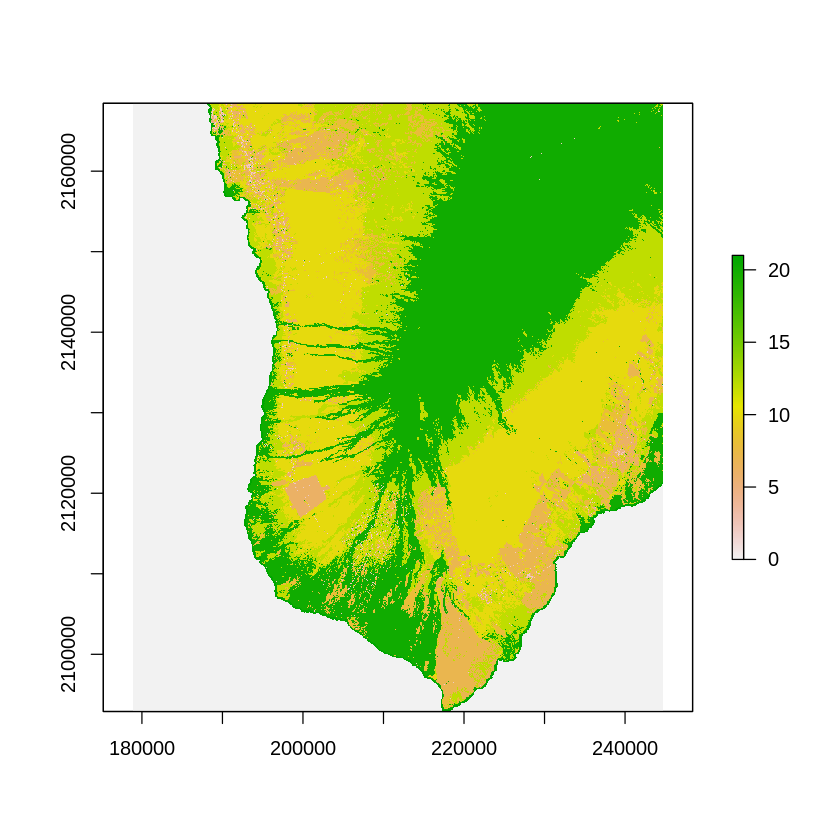

In [17]:
ccap_raster %>% plot

In [18]:
ncol(ccap_raster)

nrow(ccap_raster)


y_end <- c(seq(1,ccap_raster %>% nrow,512),nrow(ccap_raster))[-1]
x_end <- c(seq(1,ccap_raster %>% ncol,512),ncol(ccap_raster))[-1]

extract_grid <- expand.grid(x_end,y_end) %>% data.table

names(extract_grid) <- c('x_end','y_end')

extract_grid$x_org <- extract_grid$x_end - 512
extract_grid$y_org <- extract_grid$y_end - 512

extract_grid$id <- 1:nrow(extract_grid)

[1] 27451

[1] 31470

In [19]:

# dir.create('/TrainingData/Niihau')
# Specify the path for the new folder/directory
new_folder_path <- "/content/Hawaii05_LL/Images"
new_folder_path2 <- "/content/Hawaii05_LL/Labels"
# Use dir.create to create the new folder
dir.create(new_folder_path, showWarnings = FALSE)

# Check if the folder was created successfully
if (file.exists(new_folder_path)) {
  cat("Folder created:", new_folder_path, "\n")
} else {
  cat("Failed to create folder:", new_folder_path, "\n")
}


# Use dir.create to create the new folder
dir.create(new_folder_path2, showWarnings = FALSE)
# Check if the folder was created successfully
if (file.exists(new_folder_path2)) {
  cat("Folder created:", new_folder_path2, "\n")
} else {
  cat("Failed to create folder:", new_folder_path2, "\n")
}

Folder created: /content/Hawaii05_LL/Images 
Folder created: /content/Hawaii05_LL/Labels 


In [20]:
result_dt <-
1:nrow(extract_grid) %>% lapply(function(x){

  nrow <- 0
  ncol <- 0
  i <- 0
  while(nrow !=512 | ncol != 512){
    i <- i + 1
    # Calculate the geographic coordinates for the cropping extent
    xmin <- xFromCol(ccap_raster, extract_grid[x,]$x_org) + rnorm(1)*.01*2.4
    xmax <- xFromCol(ccap_raster, extract_grid[x,]$x_end) + rnorm(1)*.01*2.4
    ymin <- yFromRow(ccap_raster, extract_grid[x,]$y_end) + rnorm(1)*.01*2.4 # Note row_max as raster origin is top-left
    ymax <- yFromRow(ccap_raster, extract_grid[x,]$y_org) + rnorm(1)*.01*2.4 # Note row_min as raster origin is top-left

    e <- extent(xmin, xmax, ymin, ymax)

    ccap_cropped_raster <- crop(ccap_raster, e)

    nrow <- nrow(ccap_cropped_raster)
    ncol <- ncol(ccap_cropped_raster)


    # print(dim(ccap_cropped_raster))
    if(i>1000){return('failed to converge')}
    }

  ls_cropped_raster <- crop(ls_raster_extended, projectExtent(ccap_cropped_raster,ls_raster))

  ls_resampled_raster <- projectRaster(ls_cropped_raster,ccap_cropped_raster)
  print(ls_resampled_raster)
  pixel_table <- (table(values(ccap_cropped_raster))/ncell(ccap_cropped_raster)) %>% data.table

  names(pixel_table) <- c('label','percent')

  out_dt <- data.table(extract_grid[x,],xmin = xmin,xmax =xmax,ymin= ymin,ymax, pixel_table)

  if(ls_resampled_raster %>% nrow ==512 & ls_resampled_raster %>% ncol ==512 & ccap_cropped_raster%>% nrow ==512 & ccap_cropped_raster%>% ncol ==512){
    ls_resampled_raster %>%
    writeRaster(., paste("/content/Hawaii05_LL/Images/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)

    ccap_cropped_raster %>%
    writeRaster(., paste("/content/Hawaii05_LL/Labels/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)
  }else(print('uh oh'))

  return(out_dt)
})
result_dt[ result_dt %>% lapply(function(x){is.data.table(x)}) %>% unlist] %>% rbindlist %>%
fwrite("/content/Hawaii05_LL/Hawaii05_LL.csv") # /content/Maui10/

result_dt[ result_dt %>% lapply(function(x){is.data.table(x)}) %>% unlist] %>% rbindlist %>%
fwrite("/content/Hawaii05_LL.csv") # make a copy outside of the zip folder too

In [ ]:
zip(zipfile = "/content/Hawaii05_LL.zip", files = "/content/Hawaii05_LL")

zip(zipfile = "/content/Hawaii05_LL.zip",
    files = c("/content/Hawaii05_LL/Images",
              "/content/Hawaii05_LL/Labels",
              "/content/Hawaii05_LL/Hawaii05_LL.csv"))

Warning message in fix_absolute_paths(data$key):
“Dropping leading `/` from paths, all paths in a zip file must be relative paths.”


In [ ]:
# revised_trainingdata https://drive.google.com/drive/folders/1s7g2RtSXxgH6l1PdZGQwkGn7AGPueGB5?usp=drive_link
drive_upload(media = "/content/Hawaii05_LL.zip", path = as_id("1s7g2RtSXxgH6l1PdZGQwkGn7AGPueGB5"))